# Logistic Regression Model

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('LoanApprovalPrediction.csv') 

In [18]:
# Handle missing values
df.fillna(0, inplace=True)

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Married'] = le.fit_transform(df['Married'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [19]:
X = df[['Education', 'Married', 'ApplicantIncome', 'Credit_History']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy percentage: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Accuracy percentage: 80.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59        35
           1       0.81      0.93      0.87        85

    accuracy                           0.80       120
   macro avg       0.78      0.71      0.73       120
weighted avg       0.79      0.80      0.79       120



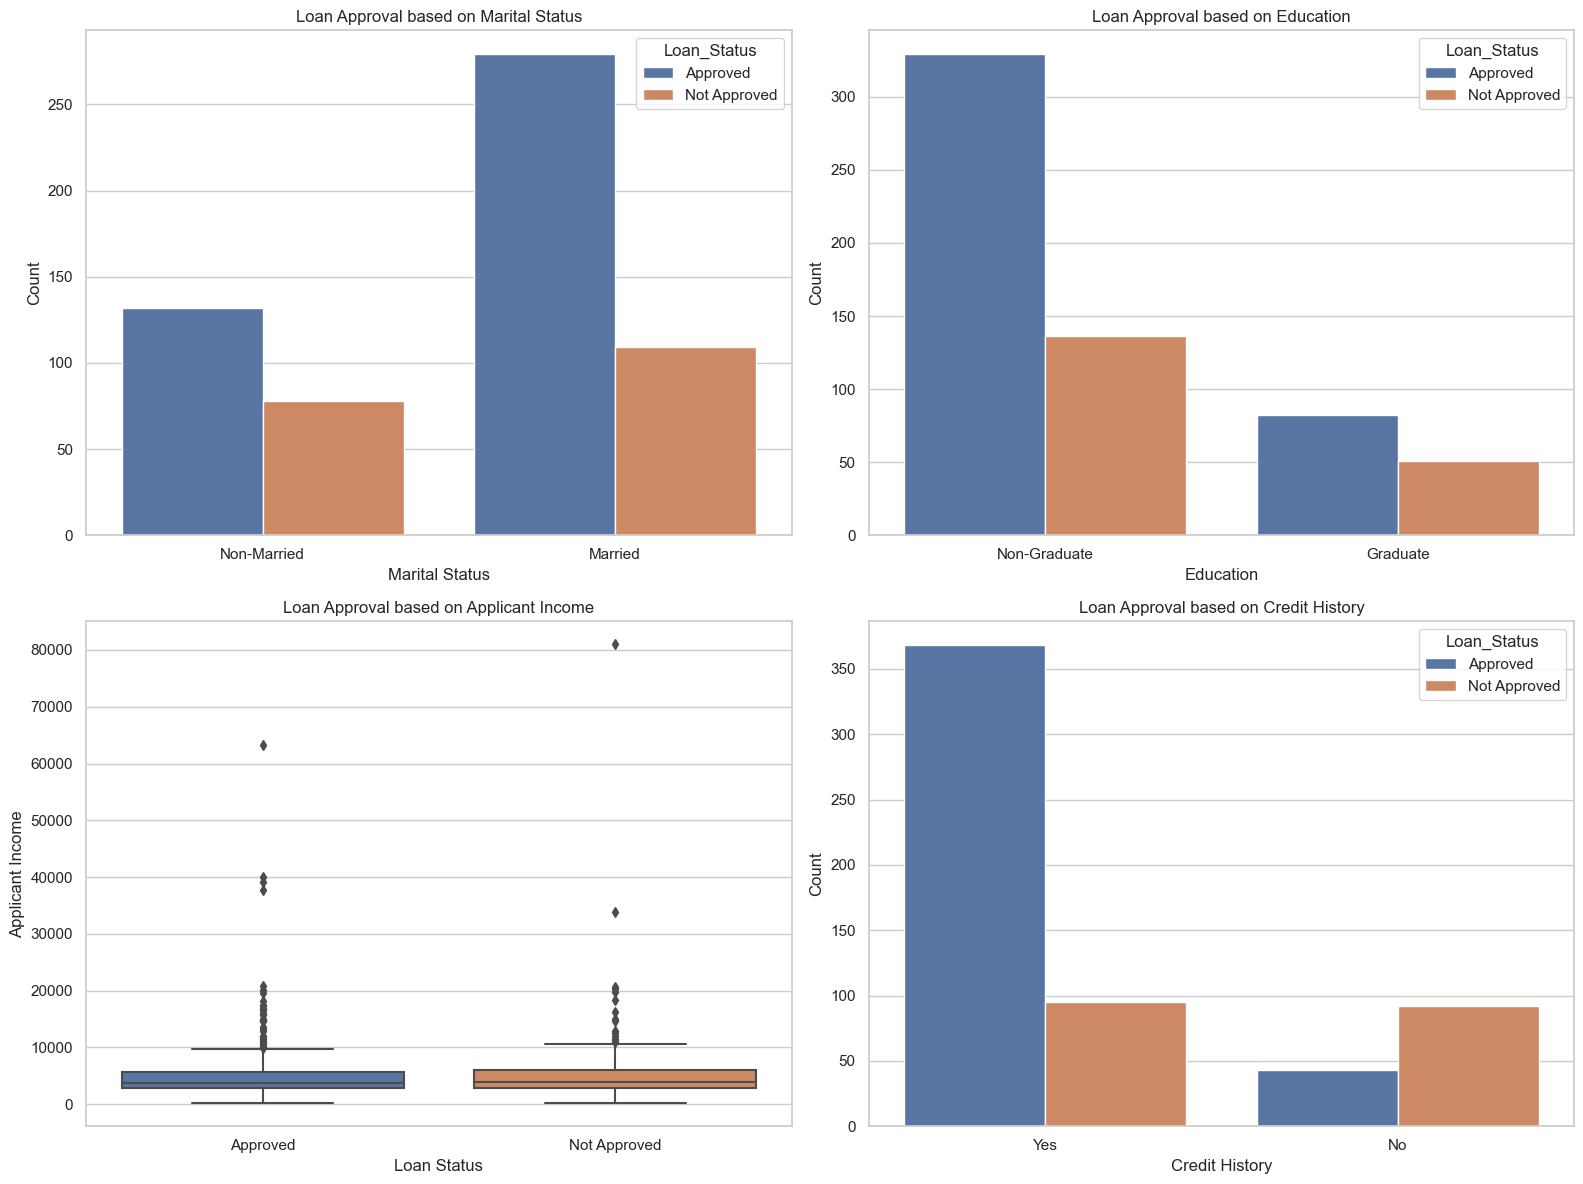

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numerical values to categorical for better visualization
df['Married'] = df['Married'].map({1: 'Married', 0: 'Non-Married'})
df['Education'] = df['Education'].map({1: 'Graduate', 0: 'Non-Graduate'})
df['Loan_Status'] = df['Loan_Status'].map({1: 'Approved', 0: 'Not Approved'})
df['Credit_History'] = df['Credit_History'].map({1: 'Yes', 0: 'No'})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Loan Approval based on Marital Status
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Loan Approval based on Marital Status')
axes[0, 0].set_xlabel('Marital Status')
axes[0, 0].set_ylabel('Count')

# Plot 2: Loan Approval based on Education
sns.countplot(x='Education', hue='Loan_Status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Loan Approval based on Education')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Count')

# Plot 3: Loan Approval based on Applicant Income
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Approval based on Applicant Income')
axes[1, 0].set_xlabel('Loan Status')
axes[1, 0].set_ylabel('Applicant Income')

# Plot 4: Loan Approval based on Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Approval based on Credit History')
axes[1, 1].set_xlabel('Credit History')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Metrics for Logistic Regression:
Precision: 0.8144
Recall: 0.9294
ROC-AUC: 0.7439


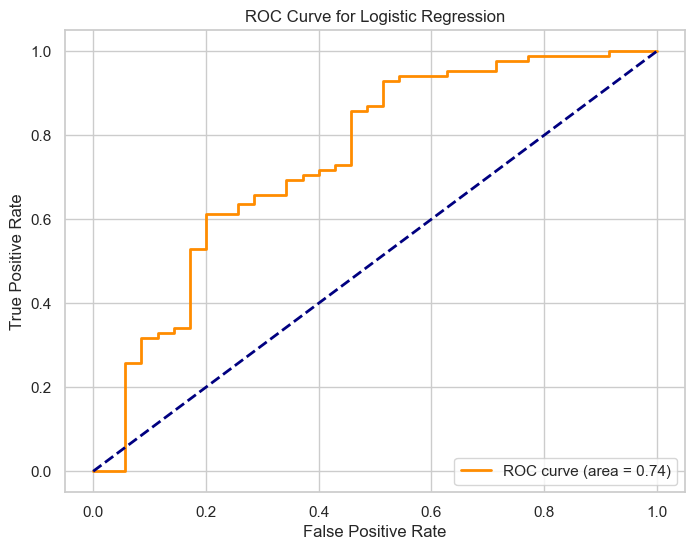

In [76]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to calculate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\nMetrics for {model_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Logistic Regression model
evaluate_model(model, X_test, y_test, 'Logistic Regression')



# interpretation:

### 1 Marital Status:
#### The plot shows that married individuals have a higher count of loan approvals compared to non-married individuals. This suggests that marital status may influence the likelihood of loan approval, with married individuals being more likely to get approved.

### 2 Education :
#### The visualization indicates that graduates have a slightly higher count of loan approvals compared to non-graduates. This suggests that education level may have some impact on loan approval, with graduates having a relatively higher approval rate.

### 3 Applicant Income :
#### The boxplot shows that there is not a significant difference in the distribution of Applicant Income between approved and not approved loan applications. This suggests that, based on income alone, there may not be a clear distinction between approved and not approved loan applications.

### 4 Credit History:
#### The plot indicates that applicants with a credit history of "Yes" have a significantly higher count of loan approvals compared to those with a credit history of "No." This emphasizes the importance of a positive credit history in the loan approval process.

#### In summary, marital status and education level appear to have some influence on loan approval, with married individuals and graduates having higher approval rates. Additionally, a positive credit history seems to be a crucial factor for loan approval. However, these interpretations are based on the visualizations, and further statistical analysis may be necessary for a more comprehensive understanding.

# Random Forest Model

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Load the dataset
df = pd.read_csv('LoanApprovalPrediction.csv') 

In [64]:
# Handle missing values
df.fillna(0, inplace=True)

In [65]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Married'] = le.fit_transform(df['Married'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [66]:
# Split the data into training and testing sets
X = df[['Education', 'Married', 'ApplicantIncome', 'Credit_History']]
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Evaluate the model
y_pred_rf = rf_model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Accuracy Percentage: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.6833333333333333
Accuracy Percentage: 68.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.37      0.41        35
           1       0.76      0.81      0.78        85

    accuracy                           0.68       120
   macro avg       0.60      0.59      0.60       120
weighted avg       0.67      0.68      0.67       120



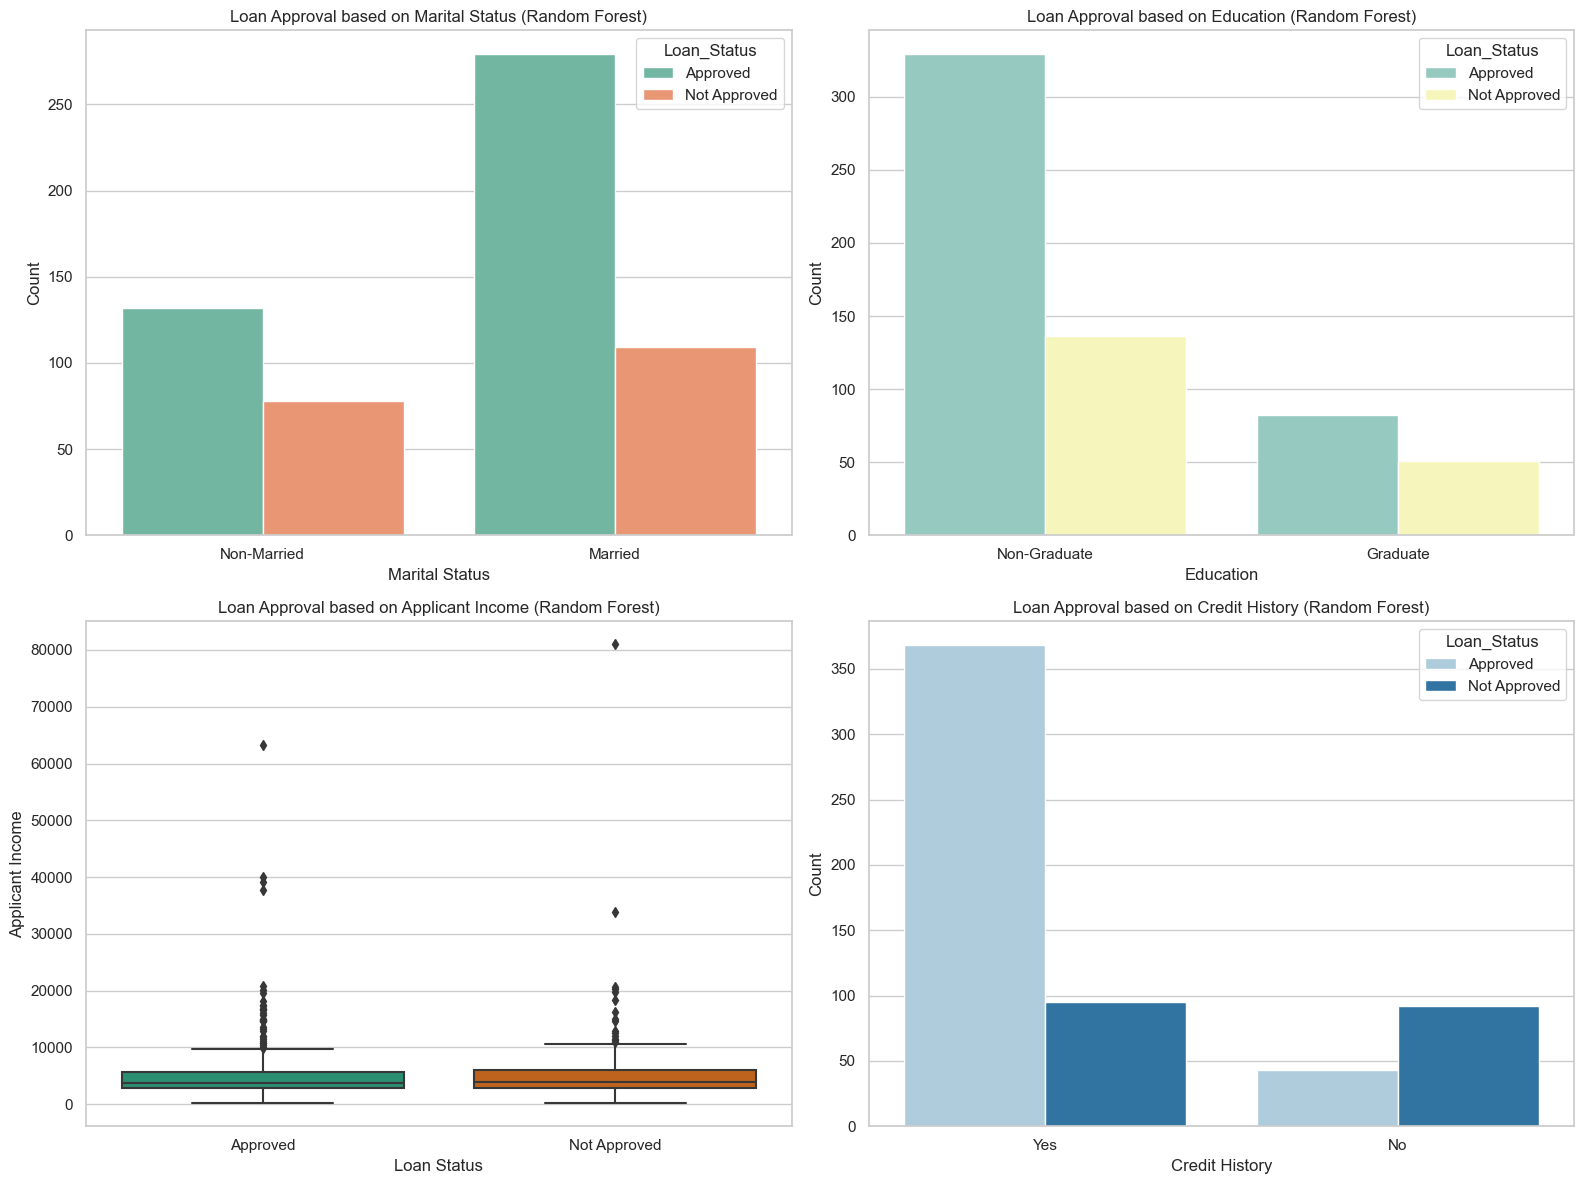

In [71]:
# Set a different color palette
sns.set_palette("pastel")

# Create subplots with a different style
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot 1: Loan Approval based on Marital Status using Random Forest
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Loan Approval based on Marital Status (Random Forest)')
axes[0, 0].set_xlabel('Marital Status')
axes[0, 0].set_ylabel('Count')

# Plot 2: Loan Approval based on Education using Random Forest
sns.countplot(x='Education', hue='Loan_Status', data=df, ax=axes[0, 1], palette="Set3")
axes[0, 1].set_title('Loan Approval based on Education (Random Forest)')
axes[0, 1].set_xlabel('Education')
axes[0, 1].set_ylabel('Count')

# Plot 3: Loan Approval based on Applicant Income using Random Forest
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, ax=axes[1, 0], palette="Dark2")
axes[1, 0].set_title('Loan Approval based on Applicant Income (Random Forest)')
axes[1, 0].set_xlabel('Loan Status')
axes[1, 0].set_ylabel('Applicant Income')

# Plot 4: Loan Approval based on Credit History using Random Forest
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, ax=axes[1, 1], palette="Paired")
axes[1, 1].set_title('Loan Approval based on Credit History (Random Forest)')
axes[1, 1].set_xlabel('Credit History')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Metrics for Random Forest:
Precision: 0.7582
Recall: 0.8118
ROC-AUC: 0.6570


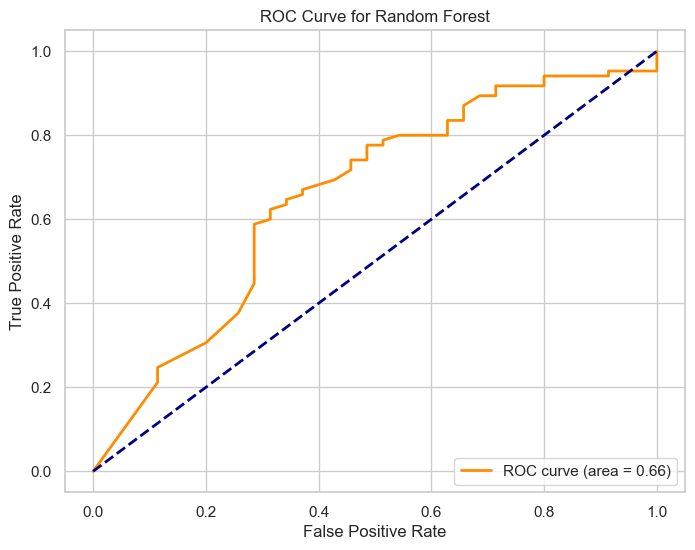

In [77]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to calculate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\nMetrics for {model_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test, 'Random Forest')

# Interpretation:
### Precision: The fraction of correctly predicted positive instances among the instances predicted as positive. A higher precision indicates fewer false positives.

### (Sensitivity): The fraction of correctly predicted positive instances among all actual positive instances. A higher recall indicates fewer false negatives.

### ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): Measures the ability of the model to distinguish between positive and negative instances. A higher ROC-AUC indicates a better-performing model.

### The ROC curve visually represents the trade-off between sensitivity and specificity. The model with a higher ROC-AUC is generally considered better at making predictions.